In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [125]:
wine = datasets.load_wine()
#wine = wine['data']
feature_names = wine['feature_names']

data = pd.DataFrame(wine['data'], columns=feature_names)
target = wine.target


In [78]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [79]:
#get covariance matrix of dataset
covMatrix = data.cov()

In [80]:
covMatrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


In [113]:
print(np.mean(data['alcohol']))
print(np.std(data['alcohol']))


13.000617977528083
0.809542914528517


In [114]:
normData.iloc[0]

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64

In [267]:
#Get normalized data
def normalize(data): 
    normData = data.copy()
    for col in normData.columns:
        #print(col, end=': ')
        mean = np.mean(normData[col])
        #print('mean', mean, end='; ')
        std = np.std(normData[col])
        #print('std', std)
        #print()
        #normData.index
        for row in normData.index:
            #print('x', normData.iloc[row])
            #print('mean', mean)
            #print('std', std)
            normData.loc[row, col] = (normData.loc[row, col] - mean) / std
            #print(normData.at[row, col])
    return normData

In [268]:
normData = normalize(data)

In [269]:
#get covariance of normalized data
normCovMatrix = normData.cov()
normCovMatrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.005650,0.094930,0.212740,-0.311988,0.272328,0.290734,0.238153,-0.156810,0.137470,0.549451,-0.072153,0.072752,0.647357
malic_acid,0.094930,1.005650,0.164972,0.290130,-0.054883,-0.337061,-0.413329,0.294632,-0.221993,0.250392,-0.564467,-0.370794,-0.193095
ash,0.212740,0.164972,1.005650,0.445872,0.288206,0.129708,0.115727,0.187283,0.009706,0.260350,-0.075089,0.003933,0.224890
alcalinity_of_ash,-0.311988,0.290130,0.445872,1.005650,-0.083804,-0.322928,-0.353355,0.363966,-0.198442,0.018838,-0.275503,-0.278332,-0.443086
magnesium,0.272328,-0.054883,0.288206,-0.083804,1.005650,0.215613,0.196890,-0.257742,0.237776,0.201080,0.055711,0.066377,0.395573
total_phenols,0.290734,-0.337061,0.129708,-0.322928,0.215613,1.005650,0.869448,-0.452477,0.615873,-0.055448,0.436132,0.703904,0.500929
flavanoids,0.238153,-0.413329,0.115727,-0.353355,0.196890,0.869448,1.005650,-0.540939,0.656379,-0.173353,0.546549,0.791641,0.496985
nonflavanoid_phenols,-0.156810,0.294632,0.187283,0.363966,-0.257742,-0.452477,-0.540939,1.005650,-0.367912,0.139843,-0.264123,-0.506113,-0.313144
proanthocyanins,0.137470,-0.221993,0.009706,-0.198442,0.237776,0.615873,0.656379,-0.367912,1.005650,-0.025393,0.297214,0.522000,0.332283
color_intensity,0.549451,0.250392,0.260350,0.018838,0.201080,-0.055448,-0.173353,0.139843,-0.025393,1.005650,-0.524761,-0.431238,0.317886


In [270]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [279]:
#Every pair of metrics shows up twice
#This function removes one version of each pair (along with pricipal axis in which all correlations equal 1.0)
def removeUpperTriangle(data):
    toRemove = set()
    cols = data.columns
    for i in range(len(data.columns)):
        for j in range(0, i+1):
            toRemove.add((cols[i], cols[j]))
    return toRemove

#return the highest correlations
def sortCovMatrix(data, n):
    corrs = data.corr().abs().unstack()
    dropLabels = removeUpperTriangle(data)
    corrs = corrs.drop(labels=dropLabels).sort_values(ascending=False)
    
    return corrs[0:n]


In [295]:
n = 4
sortedCovs = sortCovMatrix(normData, n)

In [296]:
sortCovMatrix(data)

total_phenols  flavanoids                      0.864564
flavanoids     od280/od315_of_diluted_wines    0.787194
total_phenols  od280/od315_of_diluted_wines    0.699949
flavanoids     proanthocyanins                 0.652692
dtype: float64

In [297]:
#save the top features in a set
topCovs = set()
for i in sortedCovs.index:
    for j in range(2):
        topCovs.add(i[j])
topCovs = list(topCovs)

In [298]:
topCovs

['proanthocyanins',
 'total_phenols',
 'flavanoids',
 'od280/od315_of_diluted_wines']

In [299]:
newData = data[topCovs]
newData.shape

(178, 4)

In [306]:
#top features covariance matrix
newCov = newData.cov()
newCov

,proanthocyanins,total_phenols,flavanoids,od280/od315_of_diluted_wines
proanthocyanins,0.327595,0.219373,0.373148,0.210933
total_phenols,0.219373,0.391690,0.540470,0.311021
flavanoids,0.373148,0.540470,0.997719,0.558262
od280/od315_of_diluted_wines,0.210933,0.311021,0.558262,0.504086


In [305]:
#top features normalized covariance matrix
normNewCov = normalize(newData).cov()
normNewCov

,proanthocyanins,total_phenols,flavanoids,od280/od315_of_diluted_wines
proanthocyanins,1.005650,0.615873,0.656379,0.522000
total_phenols,0.615873,1.005650,0.869448,0.703904
flavanoids,0.656379,0.869448,1.005650,0.791641
od280/od315_of_diluted_wines,0.522000,0.703904,0.791641,1.005650


In [329]:
normNewCov

,proanthocyanins,total_phenols,flavanoids,od280/od315_of_diluted_wines
proanthocyanins,1.005650,0.615873,0.656379,0.522000
total_phenols,0.615873,1.005650,0.869448,0.703904
flavanoids,0.656379,0.869448,1.005650,0.791641
od280/od315_of_diluted_wines,0.522000,0.703904,0.791641,1.005650


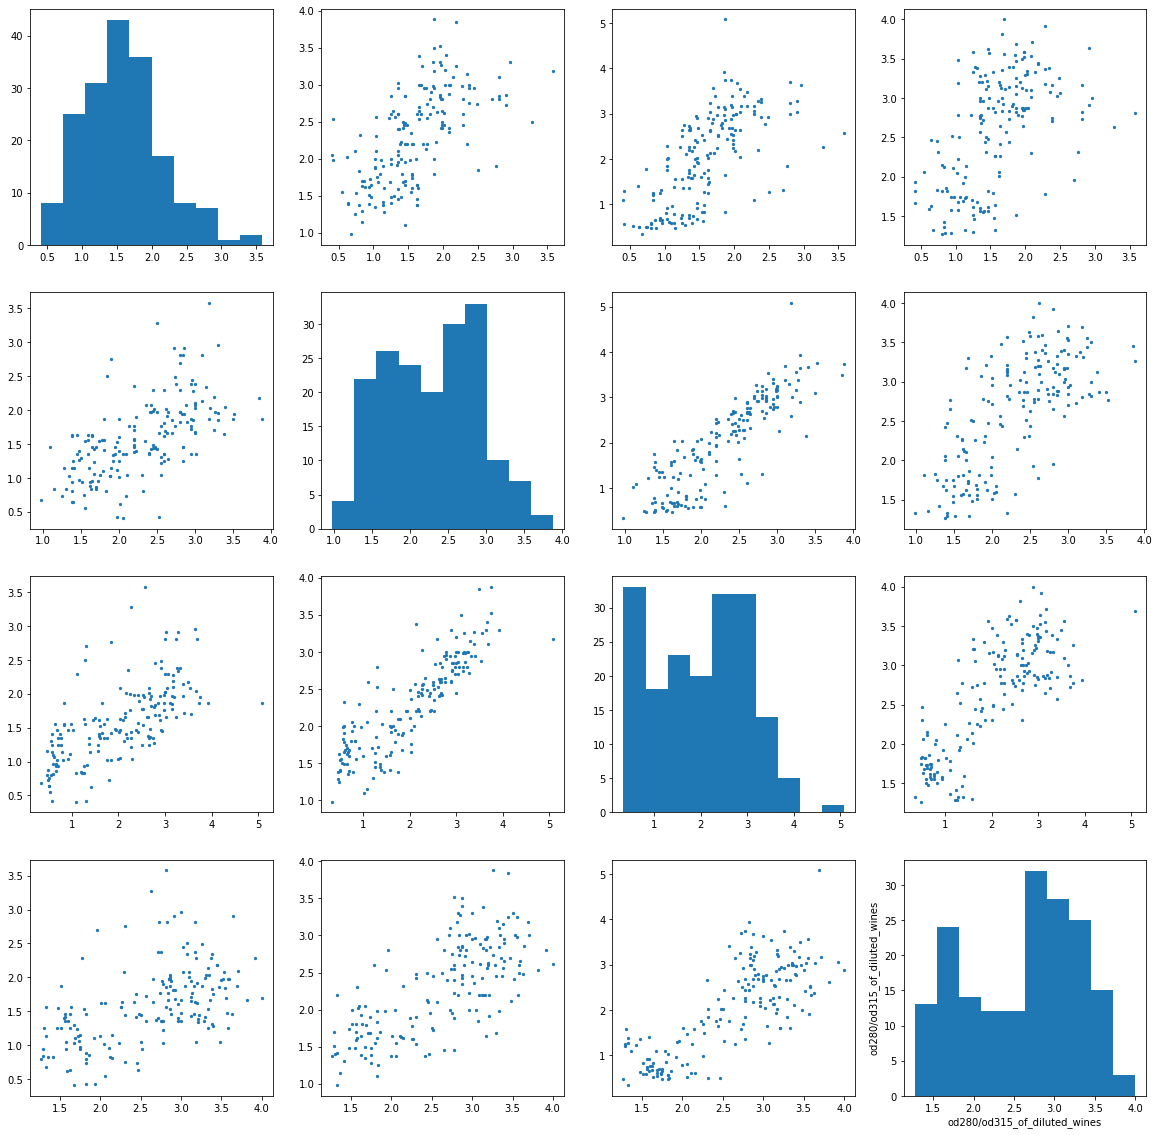

In [399]:
#plot the top features graphs
features = list(newData.columns)
figure, axs = plt.subplots(4,4, figsize = (20,20))

for i, attribute_1 in enumerate(features):
    for j,attribute_2 in enumerate(features):
        if i == j:
            axs[i,j].hist(newData[attribute_1])
            plt.xlabel(attribute_1)
            plt.ylabel(attribute_2)
        else:
            axs[i,j].scatter(newData[attribute_1], newData[attribute_2], 20, marker=".", alpha=1)
            plt.xlabel(attribute_1)
            plt.ylabel(attribute_2)
plt.show()

In [352]:
#get top right triangle indices
indices = []

for i in range(1, len(newData.columns)):
    for j in range(0, i):
        indices.append((j, i))
        feats.append

array([[0, 1],
       [0, 2],
       [1, 2],
       [0, 3],
       [1, 3],
       [2, 3]])

In [370]:
#save pairs of features
feats = []
for i in range(len(indices)):
    feats.append((features[indices[i][0]], features[indices[i][1]]))

In [458]:
feats

[('flavanoids', 'od280/od315_of_diluted_wines'),
 ('proanthocyanins', 'flavanoids'),
 ('proanthocyanins', 'od280/od315_of_diluted_wines'),
 ('proanthocyanins', 'total_phenols'),
 ('total_phenols', 'flavanoids'),
 ('total_phenols', 'od280/od315_of_diluted_wines')]

In [470]:
from sklearn.cluster import KMeans
from scipy import linalg

In [623]:
def MOG(feats):
    probabilities = [[0]*3 for i in range(data.shape[0])]
    k = 3
    for feature in feats:
        ft1 = feature[0]
        ft2 = feature[1]
        means = getRandomMeans(ft1, ft2)
        ft1Data = newData[ft1]
        ft2Data = newData[ft2]
        #need to change covMatrix for each cluster of points
        covMatrix = newData[{ft1,ft2}].cov()
        
        for n in range(k):
            subtracted = subtractMean(ft1Data, ft2Data, means[n])
            mu_k = means[n]
            const = 1 / (2*np.pi*np.sqrt(np.linalg.det(covMatrix)))
            for idx in range(subtracted.shape[0]):
                p = calcProb(subtracted, covMatrix, mu_k, constant, idx)
                probabilities[i][n] = p
            
    return probabilities
            

In [624]:
def calcProb(subtracted, covMatrix, mu_k, constant, idx):
        x = [subtracted[idx][0][0]-mu_k[0]]
        y = [subtracted[idx][1][0]-mu_k[1]]
        ptSub = np.array([x,y])
        ptSubT = -ptSub.T
        covInv = np.linalg.inv(covMatrix)
        exp = np.matmul(np.matmul(ptSubT, covInv), ptSub) / 2
        exponent = np.exp(exp[0][0])

        prob = constant*exponent
    
        return prob

In [625]:
def subtractMean(data1, data2, mean):
    result = []
    for i in range(len(data1)):
        subtract = []
        subtract.append([data1[i]-mean[0]])
        subtract.append([data2[i]-mean[1]])
        result.append(subtract)
    result = np.array(result)
    return result

In [650]:
def getRandomMeans(ft1, ft2):
    feature1 = newData[ft1]
    feature2 = newData[ft2]
    k = 3
    mus = np.empty((0,2), float)
    max_max = np.max(np.array([np.max(feature1), np.max(feature2)]))
    min_min = np.min(np.array([np.min(feature1), np.min(feature2)]))
    
    for i in range(k):
        mu_k = np.random.uniform(low=min_min, high=max_max, size=(1,2))
        mus = np.append(mus, mu_k, axis=0)
        
    return mus
    
    
    

In [594]:
probabilities = [[0]*3 for i in range(newData.shape[0])]
#print(len(probabilities))
ft1 = 'flavanoids'
ft2 = 'od280/od315_of_diluted_wines'
means = getRandomMeans(ft1, ft2)
ft1Data = newData[ft1]
ft2Data = newData[ft2]
#need to change covMatrix for each cluster of points
covMatrix = newData[{ft1,ft2}].cov()
#print('covMatrix: ', covMatrix)
for n in range(k):
    subtracted = subtractMean(ft1Data, ft2Data, means[n])
    mu_k = means[n]
    constant = 1 / (2*np.pi*np.sqrt(np.linalg.det(covMatrix)))
#     print((2*np.pi*np.sqrt(covMatrix)))
#     print(constant)
    for i in range(subtracted.shape[0]):
        x = [subtracted[i][0][0]-mu_k[0]]
        y = [subtracted[i][1][0]-mu_k[1]]
        ptSub = np.array([x,y])
        ptSubT = -ptSub.T
        covInv = np.linalg.inv(covMatrix)
        exp = np.matmul(np.matmul(ptSubT, covInv), ptSub) / 2
        exponent = np.exp(exp[0][0])
        
        prob = constant*exponent
        probabilities[i][n] = prob


In [608]:
def getClusters(ft1, ft2):
    dataCopy = newData[[ft1, ft2]].copy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(newData[[ft1, ft2]])
    clusters = kmeans.fit_predict(newData[[ft1, ft2]])
    dataCopy['clusters'] = clusters
    return dataCopy

In [686]:
probs = [[0]*3 for i in range(newData.shape[0])]
ft1 = feats[0][0]
ft2 = feats[0][1]
#means = getRandomMeans(ft1, ft2)
points = newData[[ft1, ft2]]
covMatrix = points.cov()
constant = 1 / (2*np.pi*np.sqrt(np.linalg.det(covMatrix)))
for k in range(3):
    mu_ft1 = means[k][0]
    mu_ft2 = means[k][1]
    for i in range(points.shape[0]):
        x = points[ft1][i]
        y = points[ft2][i]
        pt_mu = np.array([[x-mu_ft1],[y-mu_ft2]])
        neg_pt_mu = -pt_mu.T
        covInv = np.linalg.inv(covMatrix)
        exp = np.matmul(np.matmul(neg_pt_mu, covInv), pt_mu)
        
        exponential = linalg.expm(exp)
        p = constant*exponential[0][0]
        if i == 0 and k == 0:
            print(exponential)
            print()
            print(constant)
        probs[i][k] = p

[[1.49007529e-21]]

0.3639030671152246


In [680]:
points['flavanoids'][0]

3.06

In [692]:
df = pd.DataFrame(probs, columns={'cluster1', 'cluster2', 'cluster3'})

In [695]:
max(df['cluster1'])

0.35636108728245397

In [696]:
max(df['cluster2'])

0.36019732835762547

In [697]:
max(df['cluster3'])

9.661329225399636e-06